# Notes July 25th 2017

## Web scraping example

desired result:

    [
        {
            "name": "Christopher Balding",
            "title": "Associate Professor",
            "credential": "PhD, Political Economics, University of California at Irvine",
            "fields": ["Political Economics"]
        },
        {
            "name": "Erik Benrud",
            "title": "Professor",
            "credential": "PhD in finance, University of Virginia",
            "fields": ["Finance and Econometrics"]
        },
        ...
    ]

In [2]:
url = "http://english.phbs.pku.edu.cn/index.php?m=content&c=index&a=lists&catid=627"

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
resp = requests.get(url)
html_str = resp.text

In [6]:
soup = BeautifulSoup(html_str, "html.parser")

In [8]:
for tag in soup.find_all("h3"):
    print(tag.string)

Christopher Balding
Erik Benrud
Hursit Selcuk Celil
Wei Cen
Kevin Chastagner
Qian Chen
Jaehyuk Choi
Chia-Shang J. Chu
Tianyu Dai
Gang Fan
Yan Feng
Terrill L. Frantz
Chang Yong Ha
Wen Hai
Fan He
Haifeng Huang
Hyun Joong Im
Lan Ju
Daniel Sungyeon Kim
Frank (Fritz) H. Koger
Fanmin Kong
Sai Lan
Yingjie Lan
Daeyong Lee
Insook Lee
Nan Liu
Lan Liu
Yang Liu
Guy Liu
Jun Lu
Seungjoon Oh
David Ong
Liangyi Ouyang
Young Joon Park
Jooyoung Park
Ting Ren
Jiao Shi
Sungbin Sohn
Lei Sun
Domenico Tarzia
Naqiong Tong
Zhiyong Tu
Chunyang Wang
Qing Wang
Wei Wei
Wei Xu
Yang Xu
Juan Yang
Weiming Ye
C. James Yen
Yeujun Yoon
Yilin Zhang
Jake Zhao
Deming Zhou
Yu Zhou
Hong Zhu
Xiaotian Zhu


what's the difference between `find()` and `find_all()`?

In [9]:
x = soup.find("h3")

In [11]:
type(x)

bs4.element.Tag

In [12]:
x = soup.find_all("h3")

In [14]:
type(x)

bs4.element.ResultSet

In [17]:
type(x[0])

bs4.element.Tag

In [19]:
x[0]

<h3><a href="http://english.phbs.pku.edu.cn/content-627-1-1.html">Christopher Balding</a></h3>

In [23]:
x[1]

<h3><a href="http://english.phbs.pku.edu.cn/content-627-45-1.html">Erik Benrud</a></h3>

In [26]:
for item in soup.find_all("h3"):
    print(item.string)

Christopher Balding
Erik Benrud
Hursit Selcuk Celil
Wei Cen
Kevin Chastagner
Qian Chen
Jaehyuk Choi
Chia-Shang J. Chu
Tianyu Dai
Gang Fan
Yan Feng
Terrill L. Frantz
Chang Yong Ha
Wen Hai
Fan He
Haifeng Huang
Hyun Joong Im
Lan Ju
Daniel Sungyeon Kim
Frank (Fritz) H. Koger
Fanmin Kong
Sai Lan
Yingjie Lan
Daeyong Lee
Insook Lee
Nan Liu
Lan Liu
Yang Liu
Guy Liu
Jun Lu
Seungjoon Oh
David Ong
Liangyi Ouyang
Young Joon Park
Jooyoung Park
Ting Ren
Jiao Shi
Sungbin Sohn
Lei Sun
Domenico Tarzia
Naqiong Tong
Zhiyong Tu
Chunyang Wang
Qing Wang
Wei Wei
Wei Xu
Yang Xu
Juan Yang
Weiming Ye
C. James Yen
Yeujun Yoon
Yilin Zhang
Jake Zhao
Deming Zhou
Yu Zhou
Hong Zhu
Xiaotian Zhu


In [29]:
names = [item.string for item in soup.find_all("h3")]

In [31]:
names[50]

'Yeujun Yoon'

In [33]:
len(soup.find_all("h3"))

57

In [43]:
len(soup.find("h3"))

1

what is the "length" of a tag? it is confusing to me.

In [36]:
x = soup.find("h3")

In [38]:
type(x)

bs4.element.Tag

In [40]:
len(x)

1

In [45]:
len(soup.find("ul"))

31

my guess: how many children it has. maybe???

In [46]:
soup.find("ul")

<ul class="nav">
<li><a href="http://english.phbs.pku.edu.cn">Home</a></li>
<li><span>|</span></li>
<li>
<a href="javascript:;">About</a>
<!--//二级栏目-->
<div class="slave">
<ul>
<li><a href="http://english.phbs.pku.edu.cn/list-596-1.html">Overview</a></li>
<li><a href="http://english.phbs.pku.edu.cn/list-595-1.html">Message from the Dean</a></li>
<li><a href="http://english.phbs.pku.edu.cn/list-597-1.html">Fast Facts</a></li>
<li><a href="http://english.phbs.pku.edu.cn/list-788-1.html">History of PHBS</a></li>
<li><a href="http://english.phbs.pku.edu.cn/list-722-1.html">News &amp; Events</a></li>
<li><a href="http://english.phbs.pku.edu.cn/list-598-1.html">Visit us</a></li>
<li><a href="http://english.phbs.pku.edu.cn/list-599-1.html">Contact us</a></li>
</ul>
</div>
</li>
<li><span>|</span></li>
<li>
<a href="javascript:;">Admissions</a>
<!--//二级栏目-->
<div class="slave">
<ul>
<li><a href="http://english.phbs.pku.edu.cn/list-1636-1.html">Why PHBS?</a></li>
<li><a href="http://english.phb

okay, getting back to the task at hand.

desired result:

    [
        {
            "name": "Christopher Balding",
            "title": "Associate Professor",
            "credential": "PhD, Political Economics, University of California at Irvine",
            "fields": ["Political Economics"]
        },
        {
            "name": "Erik Benrud",
            "title": "Professor",
            "credential": "PhD in finance, University of Virginia",
            "fields": ["Finance and Econometrics"]
        },
        ...
    ]

my hypothesis:

* each professor is in a `<li>` tag with a `class` of `szll_box`, whatever that is.
* so, I'll find each of those `<li>` tags, and then look in the descendents of THAT tag: `<h3>` for the name, and then all of the `<p>` tags for the title, credentials, fields, etc.

In [49]:
# first attempt: just print out all of the stuff we want
for li_tag in soup.find_all("li", attrs={"class": "szll_box"}):
    h3_tag = li_tag.find("h3")
    print(h3_tag.string)
    p_tags = li_tag.find_all("p")
    print(p_tags[0].string)
    print(p_tags[1].string)
    print(p_tags[2].string)

Christopher Balding
Associate Professor
PhD, Political Economics, University of California at Irvine
Fields:Political Economics
Erik Benrud
Professor
PhD in finance, University of Virginia
Fields:Finance and Econometrics
Hursit Selcuk Celil
Assistant Professor
Ph. D. in Finance, Texas A&M; University
Fields:Finance - Corporate Finance; Asset Valuation
Wei Cen
Assistant Professor
PhD, Applied Economics and Management, CORNELL UNIVERSITY
Fields:Corporate Finance, Corporate Governance
Kevin Chastagner
Assistant Professor
PhD, Business Administration, Washington State University
Fields:Corporate Strategy and International Business
Qian Chen
Assistant Professor
PhD, Operations Management and Econometrics,the University of Sydney
Fields:Bayesian inference, extreme event forecasting
Jaehyuk Choi
Assistant Professor
Ph.D. in Applied Mathematics, Massachusetts Institute of Technology
Fields:Quantitative ﬁnance, Mathematical modelling, Numerical methods, Data science
Chia-Shang J. Chu
Professor


In [84]:
# next step: get a list of dictionaries
professors = []
for li_tag in soup.find_all("li", attrs={"class": "szll_box"}):
    h3_tag = li_tag.find("h3")
    p_tags = li_tag.find_all("p")
    this_prof = {
        "name": h3_tag.string,
        "title": p_tags[0].string.strip(),
        "creds": p_tags[1].string,
        "fields": p_tags[2].string
    }
    professors.append(this_prof)

Once you have a list of dictionaries, the world opens up to you.

In [57]:
professors

[{'creds': 'PhD, Political Economics, University of California at Irvine',
  'fields': 'Fields:Political Economics',
  'name': 'Christopher Balding',
  'title': 'Associate Professor'},
 {'creds': 'PhD in finance, University of Virginia',
  'fields': 'Fields:Finance and Econometrics',
  'name': 'Erik Benrud',
  'title': 'Professor'},
 {'creds': 'Ph. D. in Finance, Texas A&M; University',
  'fields': 'Fields:Finance - Corporate Finance; Asset Valuation',
  'name': 'Hursit Selcuk Celil',
  'title': 'Assistant Professor'},
 {'creds': 'PhD, Applied Economics and Management, CORNELL UNIVERSITY',
  'fields': 'Fields:Corporate Finance, Corporate Governance',
  'name': 'Wei Cen',
  'title': 'Assistant Professor'},
 {'creds': 'PhD, Business Administration, Washington State University',
  'fields': 'Fields:Corporate Strategy and International Business',
  'name': 'Kevin Chastagner',
  'title': 'Assistant Professor'},
 {'creds': 'PhD, Operations Management and Econometrics,the University of Sydney

In [85]:
from collections import Counter
c = Counter([item["title"] for item in professors])
c.most_common()

[('Assistant Professor', 38),
 ('Associate Professor', 8),
 ('Professor', 5),
 ('Assistant Professor of Management', 1),
 ('Vice Chairman of Peking University Council', 1),
 ('Assistant Dean', 1),
 ('Teaching Associate Professor', 1),
 ('Associate Professor, Associate Dean, Director of Enterprises Development Institute',
  1),
 ('Associate Professor & Associate Dean', 1)]

In [62]:
len(professors)

57

In [65]:
len([item["creds"] for item in professors if "PhD" in item["creds"]])

36

In [68]:
len([item["creds"] for item in professors if "Ph.D" in item["creds"]])

16

In [70]:
36 + 16

52

In [86]:
import pandas as pd

In [92]:
df = pd.DataFrame(professors, columns=["name", "title", "creds", "fields"])

In [93]:
df

,name,title,creds,fields
0,Christopher Balding,Associate Professor,"PhD, Political Economics, University of Califo...",Fields:Political Economics
1,Erik Benrud,Professor,"PhD in finance, University of Virginia",Fields:Finance and Econometrics
2,Hursit Selcuk Celil,Assistant Professor,"Ph. D. in Finance, Texas A&M; University",Fields:Finance - Corporate Finance; Asset Valu...
3,Wei Cen,Assistant Professor,"PhD, Applied Economics and Management, CORNELL...","Fields:Corporate Finance, Corporate Governance"
4,Kevin Chastagner,Assistant Professor,"PhD, Business Administration, Washington State...",Fields:Corporate Strategy and International Bu...
5,Qian Chen,Assistant Professor,"PhD, Operations Management and Econometrics,th...","Fields:Bayesian inference, extreme event forec..."
6,Jaehyuk Choi,Assistant Professor,"Ph.D. in Applied Mathematics, Massachusetts In...","Fields:Quantitative ﬁnance, Mathematical model..."
7,Chia-Shang J. Chu,Professor,"Ph.D.in Economics, University of California, S...","Fields:Econometric theory, Time Series Analysis"
8,Tianyu Dai,Associate Professor,"Ph.D., Management, Chinese Academy of Social S...","Fields:Oriental Economics, Cartography Analysi..."
9,Gang Fan,Professor,"PhD, Graduate School of Chinese Academy of Soc...",Fields:Macroeconomics and Chinese macroeconomi...


In [89]:
df.to_csv("professors.csv")

In [90]:
%matplotlib inline

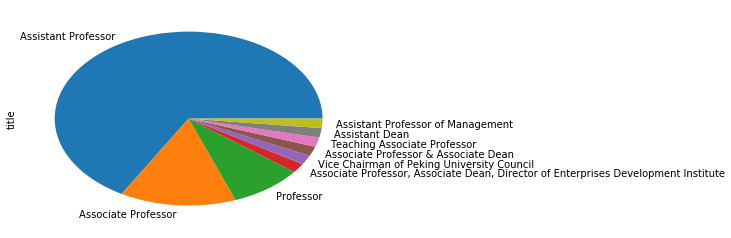

In [94]:
df["title"].value_counts().plot(kind="pie")

In [95]:
!conda install twython

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/allison/anaconda:
#
twython                   3.5.0                    py36_0    conda-forge
